In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from numpy import argmax
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from tqdm import tqdm
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
import collections
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas as pd
dog= pd.read_csv("Prediction_dog_from_mordred_morgan_fs.csv")
dog["animal"] = "dog"

In [4]:
rat= pd.read_csv("Prediction_rat_from_mordred_morgan_fs.csv")
rat["animal"] = "rat"

In [5]:
monkey= pd.read_csv("Prediction_monkey_from_mordred_morgan_fs.csv")
monkey["animal"] = "monkey"

In [6]:
dog

,HeldOut,endpoint,random_state,split,fold_2,fold_3,fold_5,gmfe,mfe,bias,rmse,r2,animal
0,HeldOut,dog_VDss_L_kg,42,0,68.000000,78.000000,84.000000,2.140764,1.175909,0.064920,0.517044,0.069333,dog
1,HeldOut,dog_VDss_L_kg,42,1,70.000000,84.000000,92.000000,1.840231,1.208961,0.122155,0.348120,0.566532,dog
2,HeldOut,dog_VDss_L_kg,42,2,58.000000,68.000000,86.000000,2.211518,1.242681,-0.081809,0.469223,0.384323,dog
3,HeldOut,dog_VDss_L_kg,42,3,52.000000,78.000000,88.000000,2.227973,1.334215,0.142037,0.449146,0.399820,dog
4,HeldOut,dog_VDss_L_kg,42,4,59.183673,69.387755,85.714286,2.259514,1.188752,-0.054438,0.518738,0.394141,dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,HeldOut,dog_fup,46,0,77.142857,85.714286,85.714286,1.830821,1.132728,-0.073270,0.254035,0.291771,dog
71,HeldOut,dog_fup,46,1,48.571429,60.000000,71.428571,3.576536,1.367761,0.094715,0.257282,0.391403,dog
72,HeldOut,dog_fup,46,2,52.941176,70.588235,79.411765,2.877169,1.301441,0.077081,0.243646,0.512348,dog
73,HeldOut,dog_fup,46,3,73.529412,85.294118,91.176471,1.871702,1.200712,-0.024105,0.223913,0.518811,dog


In [7]:
df = pd.concat([monkey, rat, dog])

In [8]:
df.endpoint.unique()

array(['monkey_VDss_L_kg', 'monkey_CL_mL_min_kg', 'monkey_fup',
       'rat_VDss_L_kg', 'rat_CL_mL_min_kg', 'rat_fup', 'dog_VDss_L_kg',
       'dog_CL_mL_min_kg', 'dog_fup'], dtype=object)

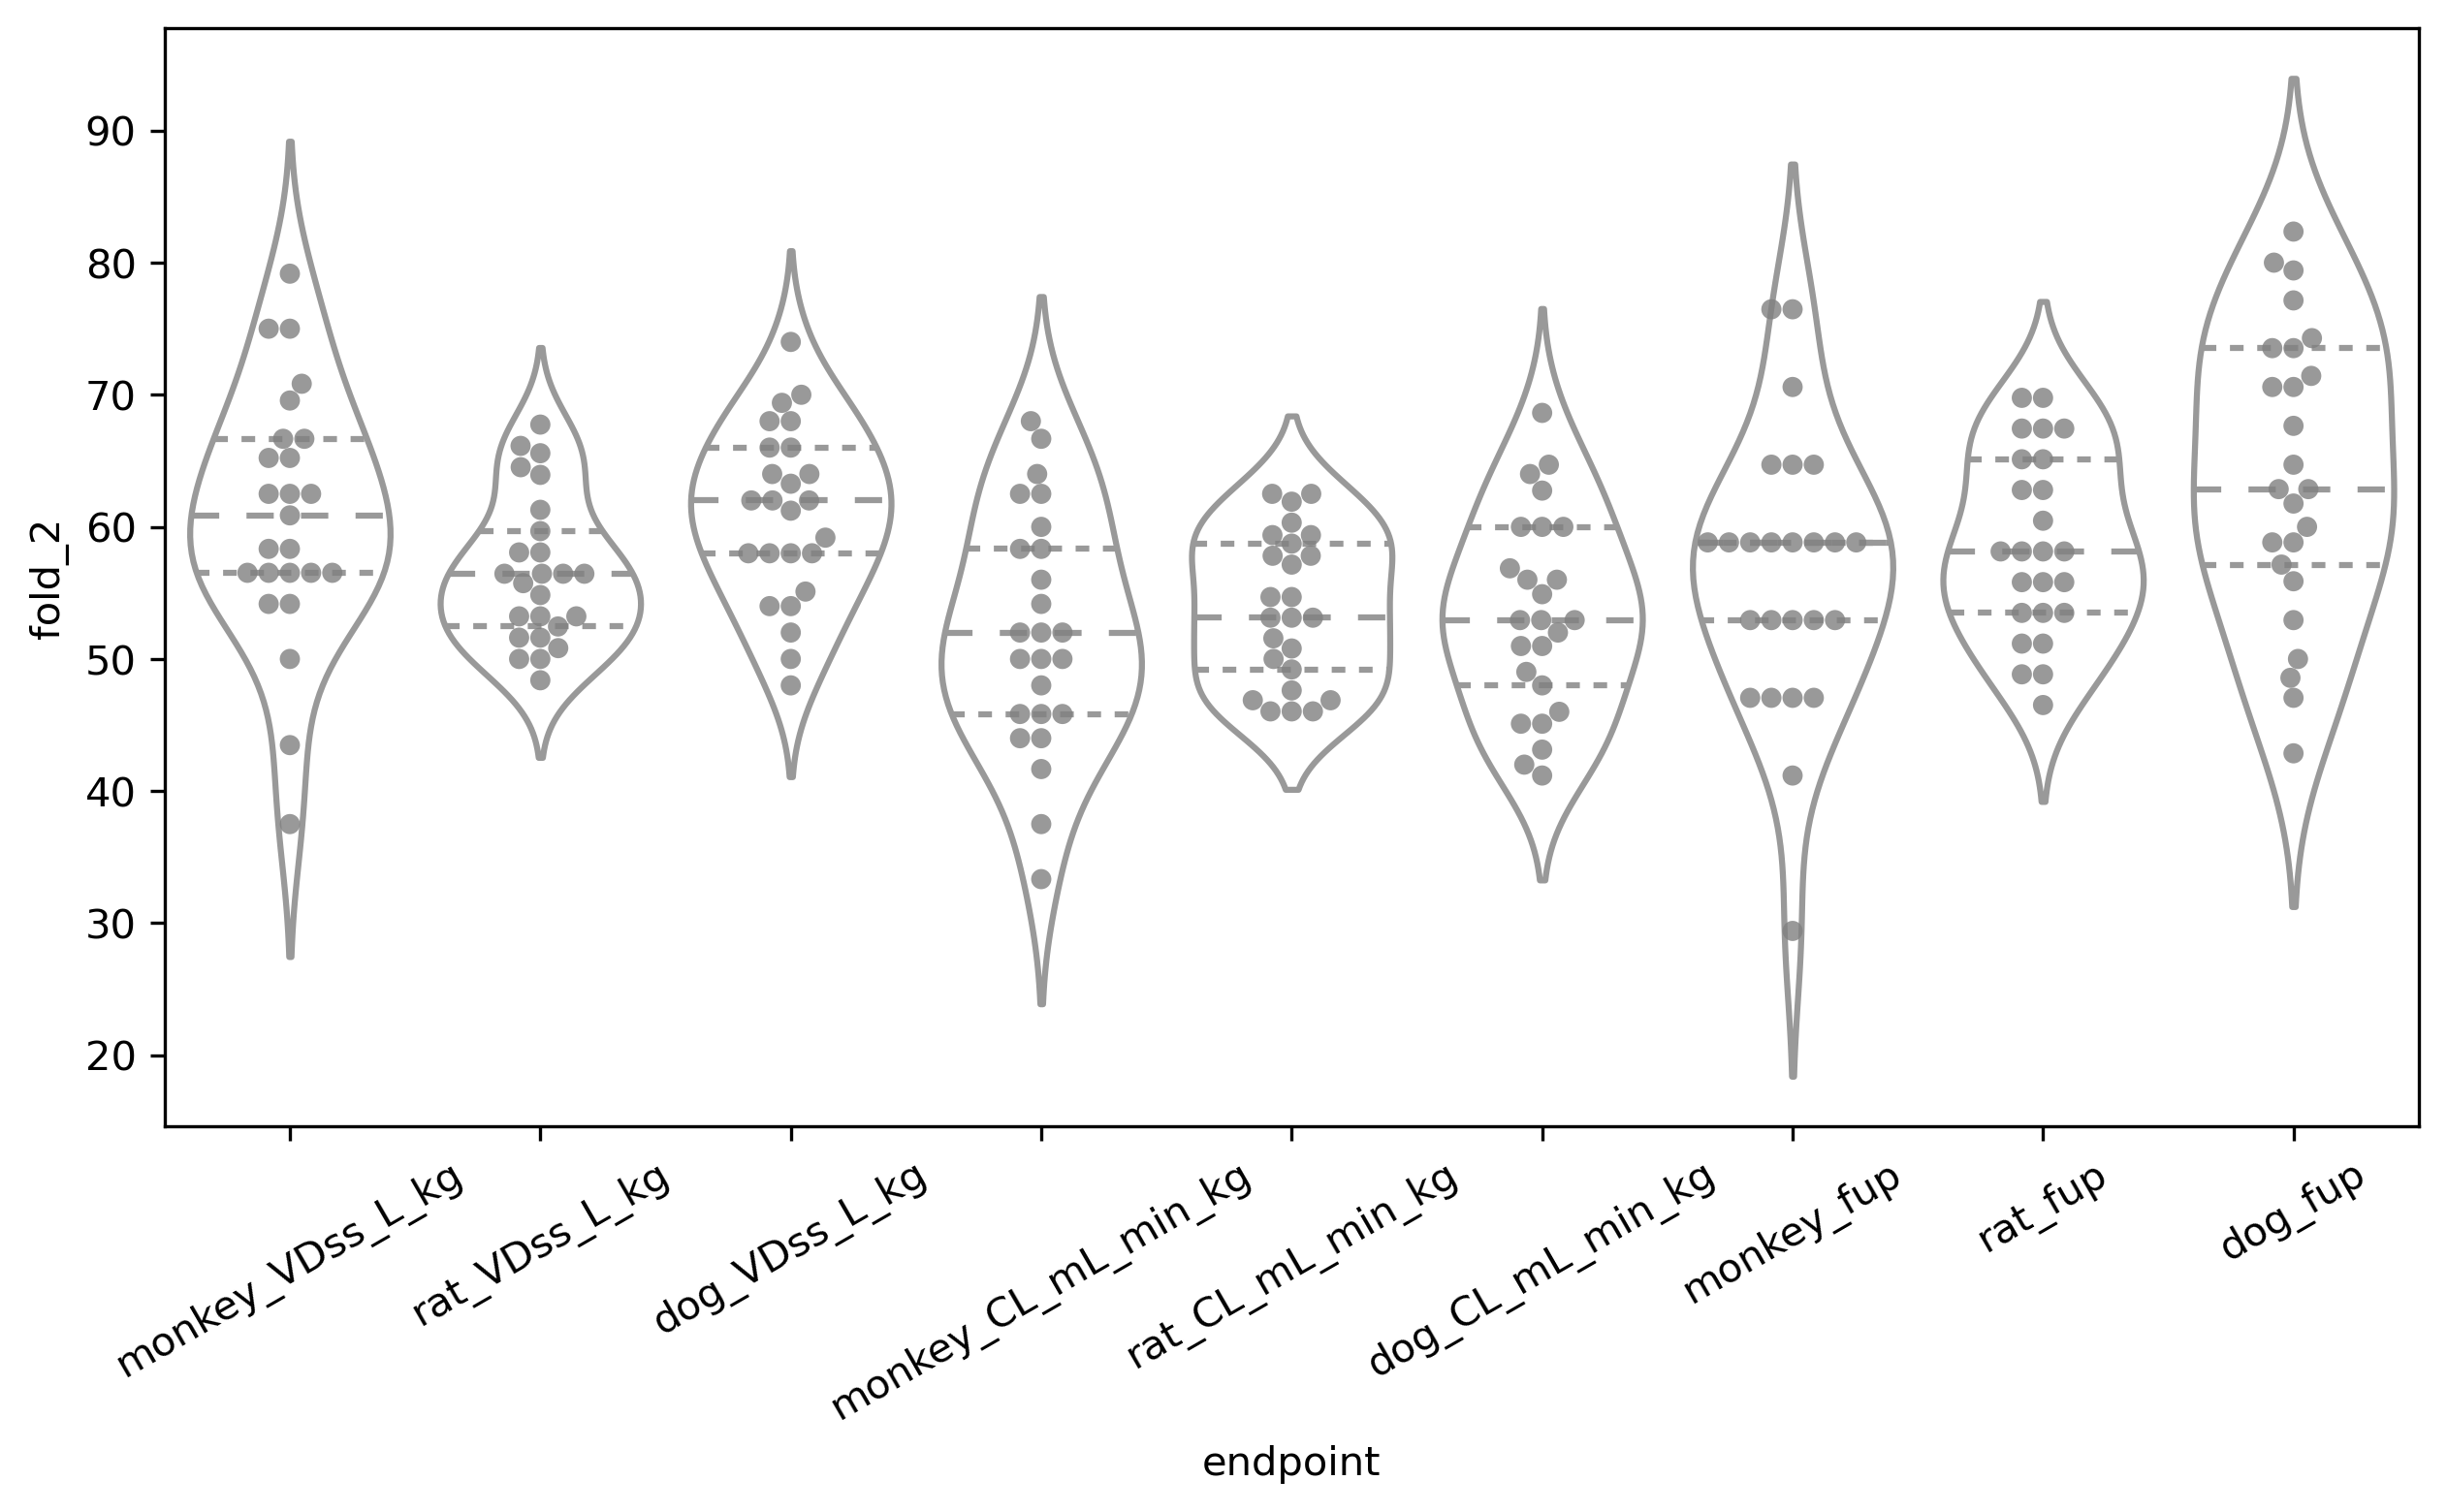

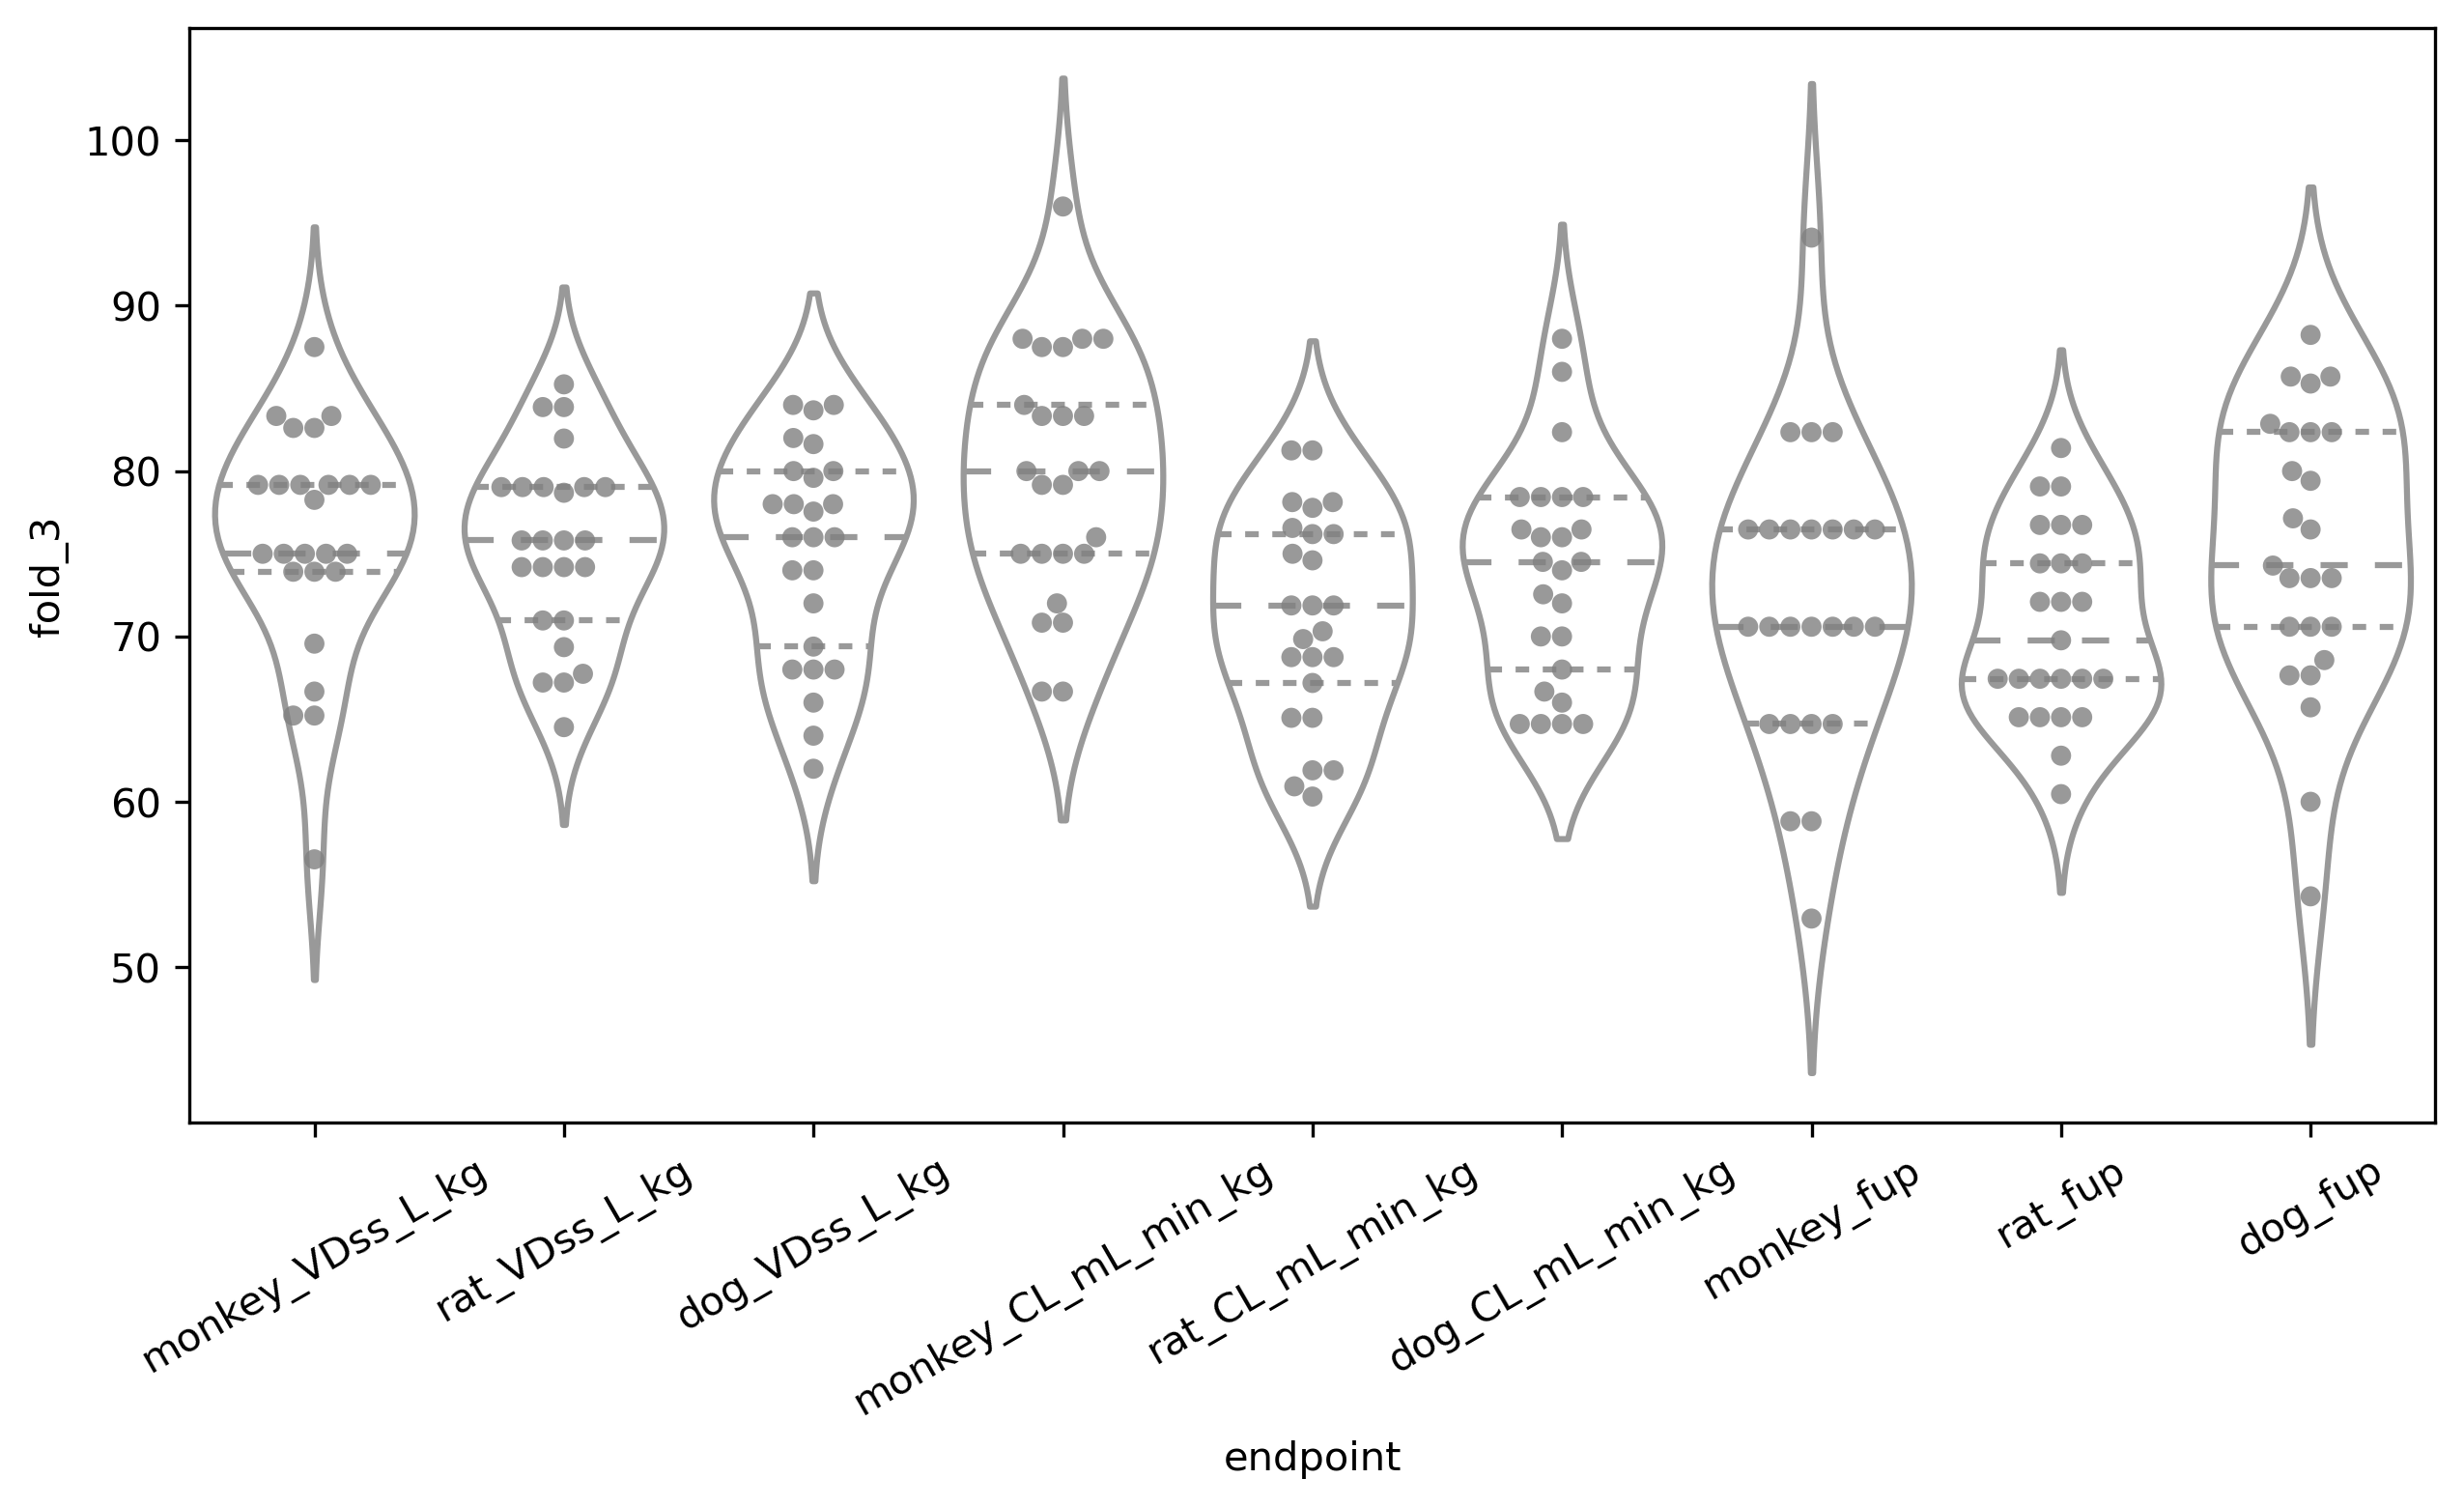

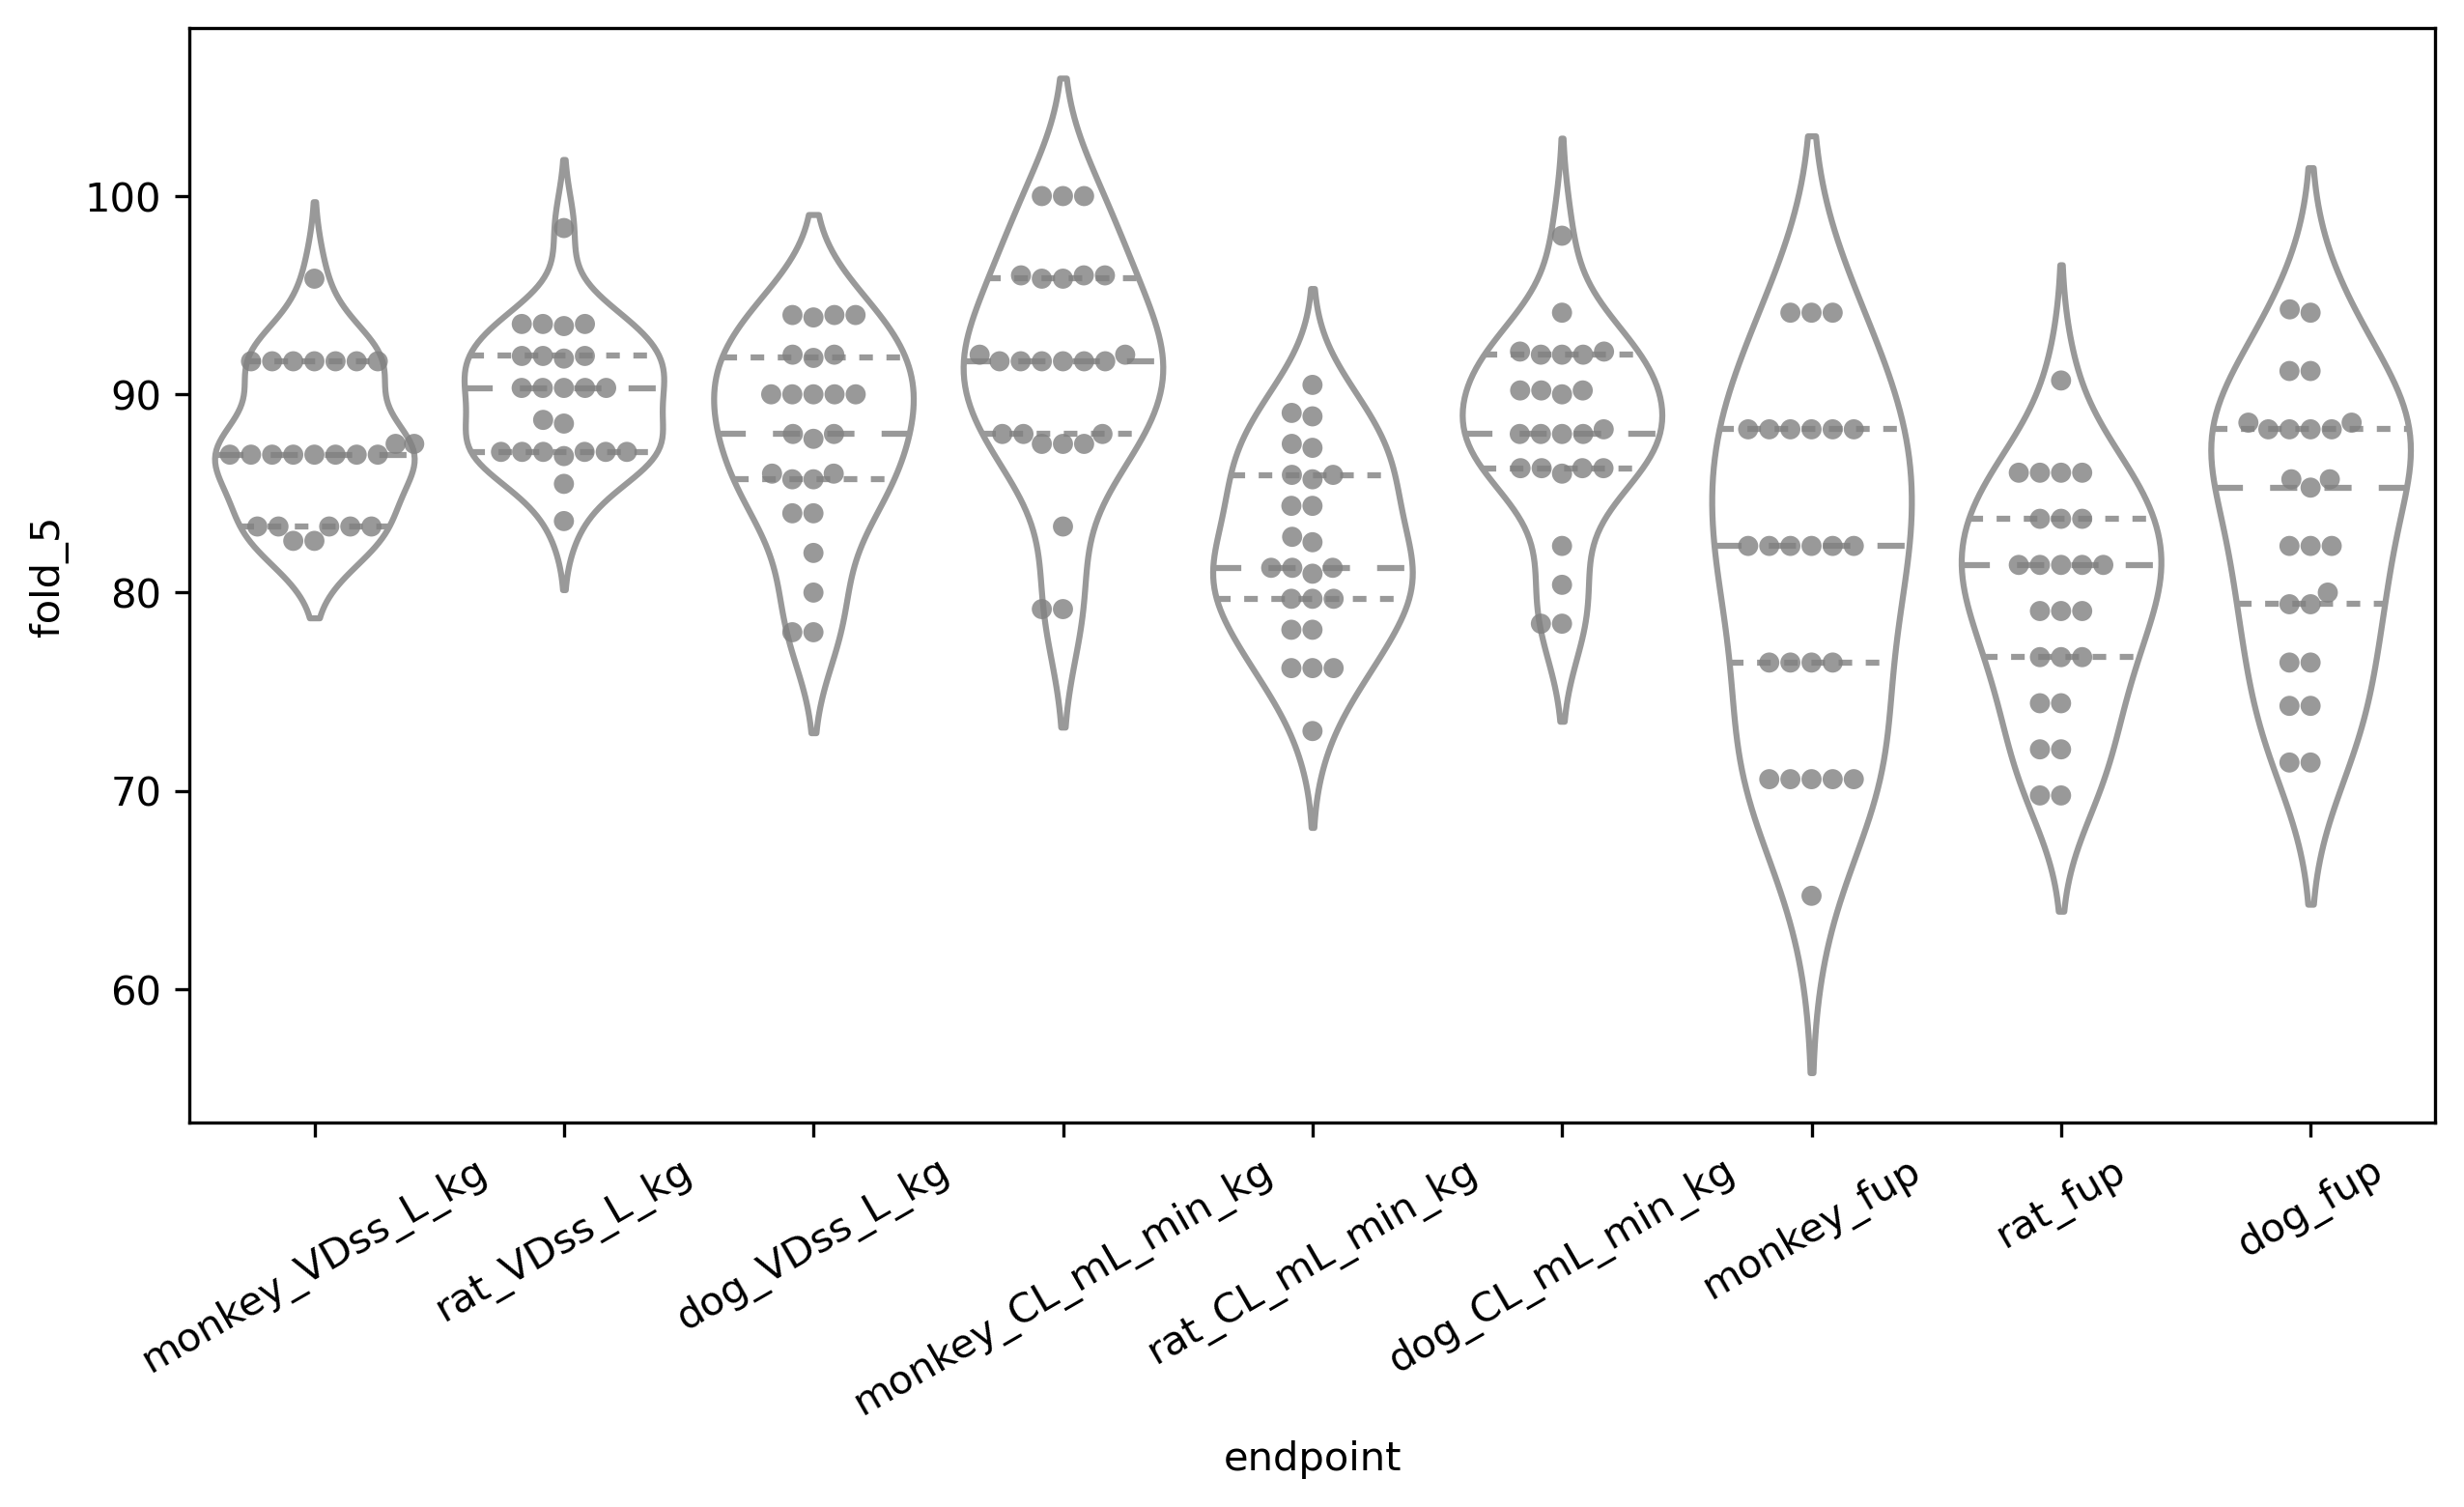

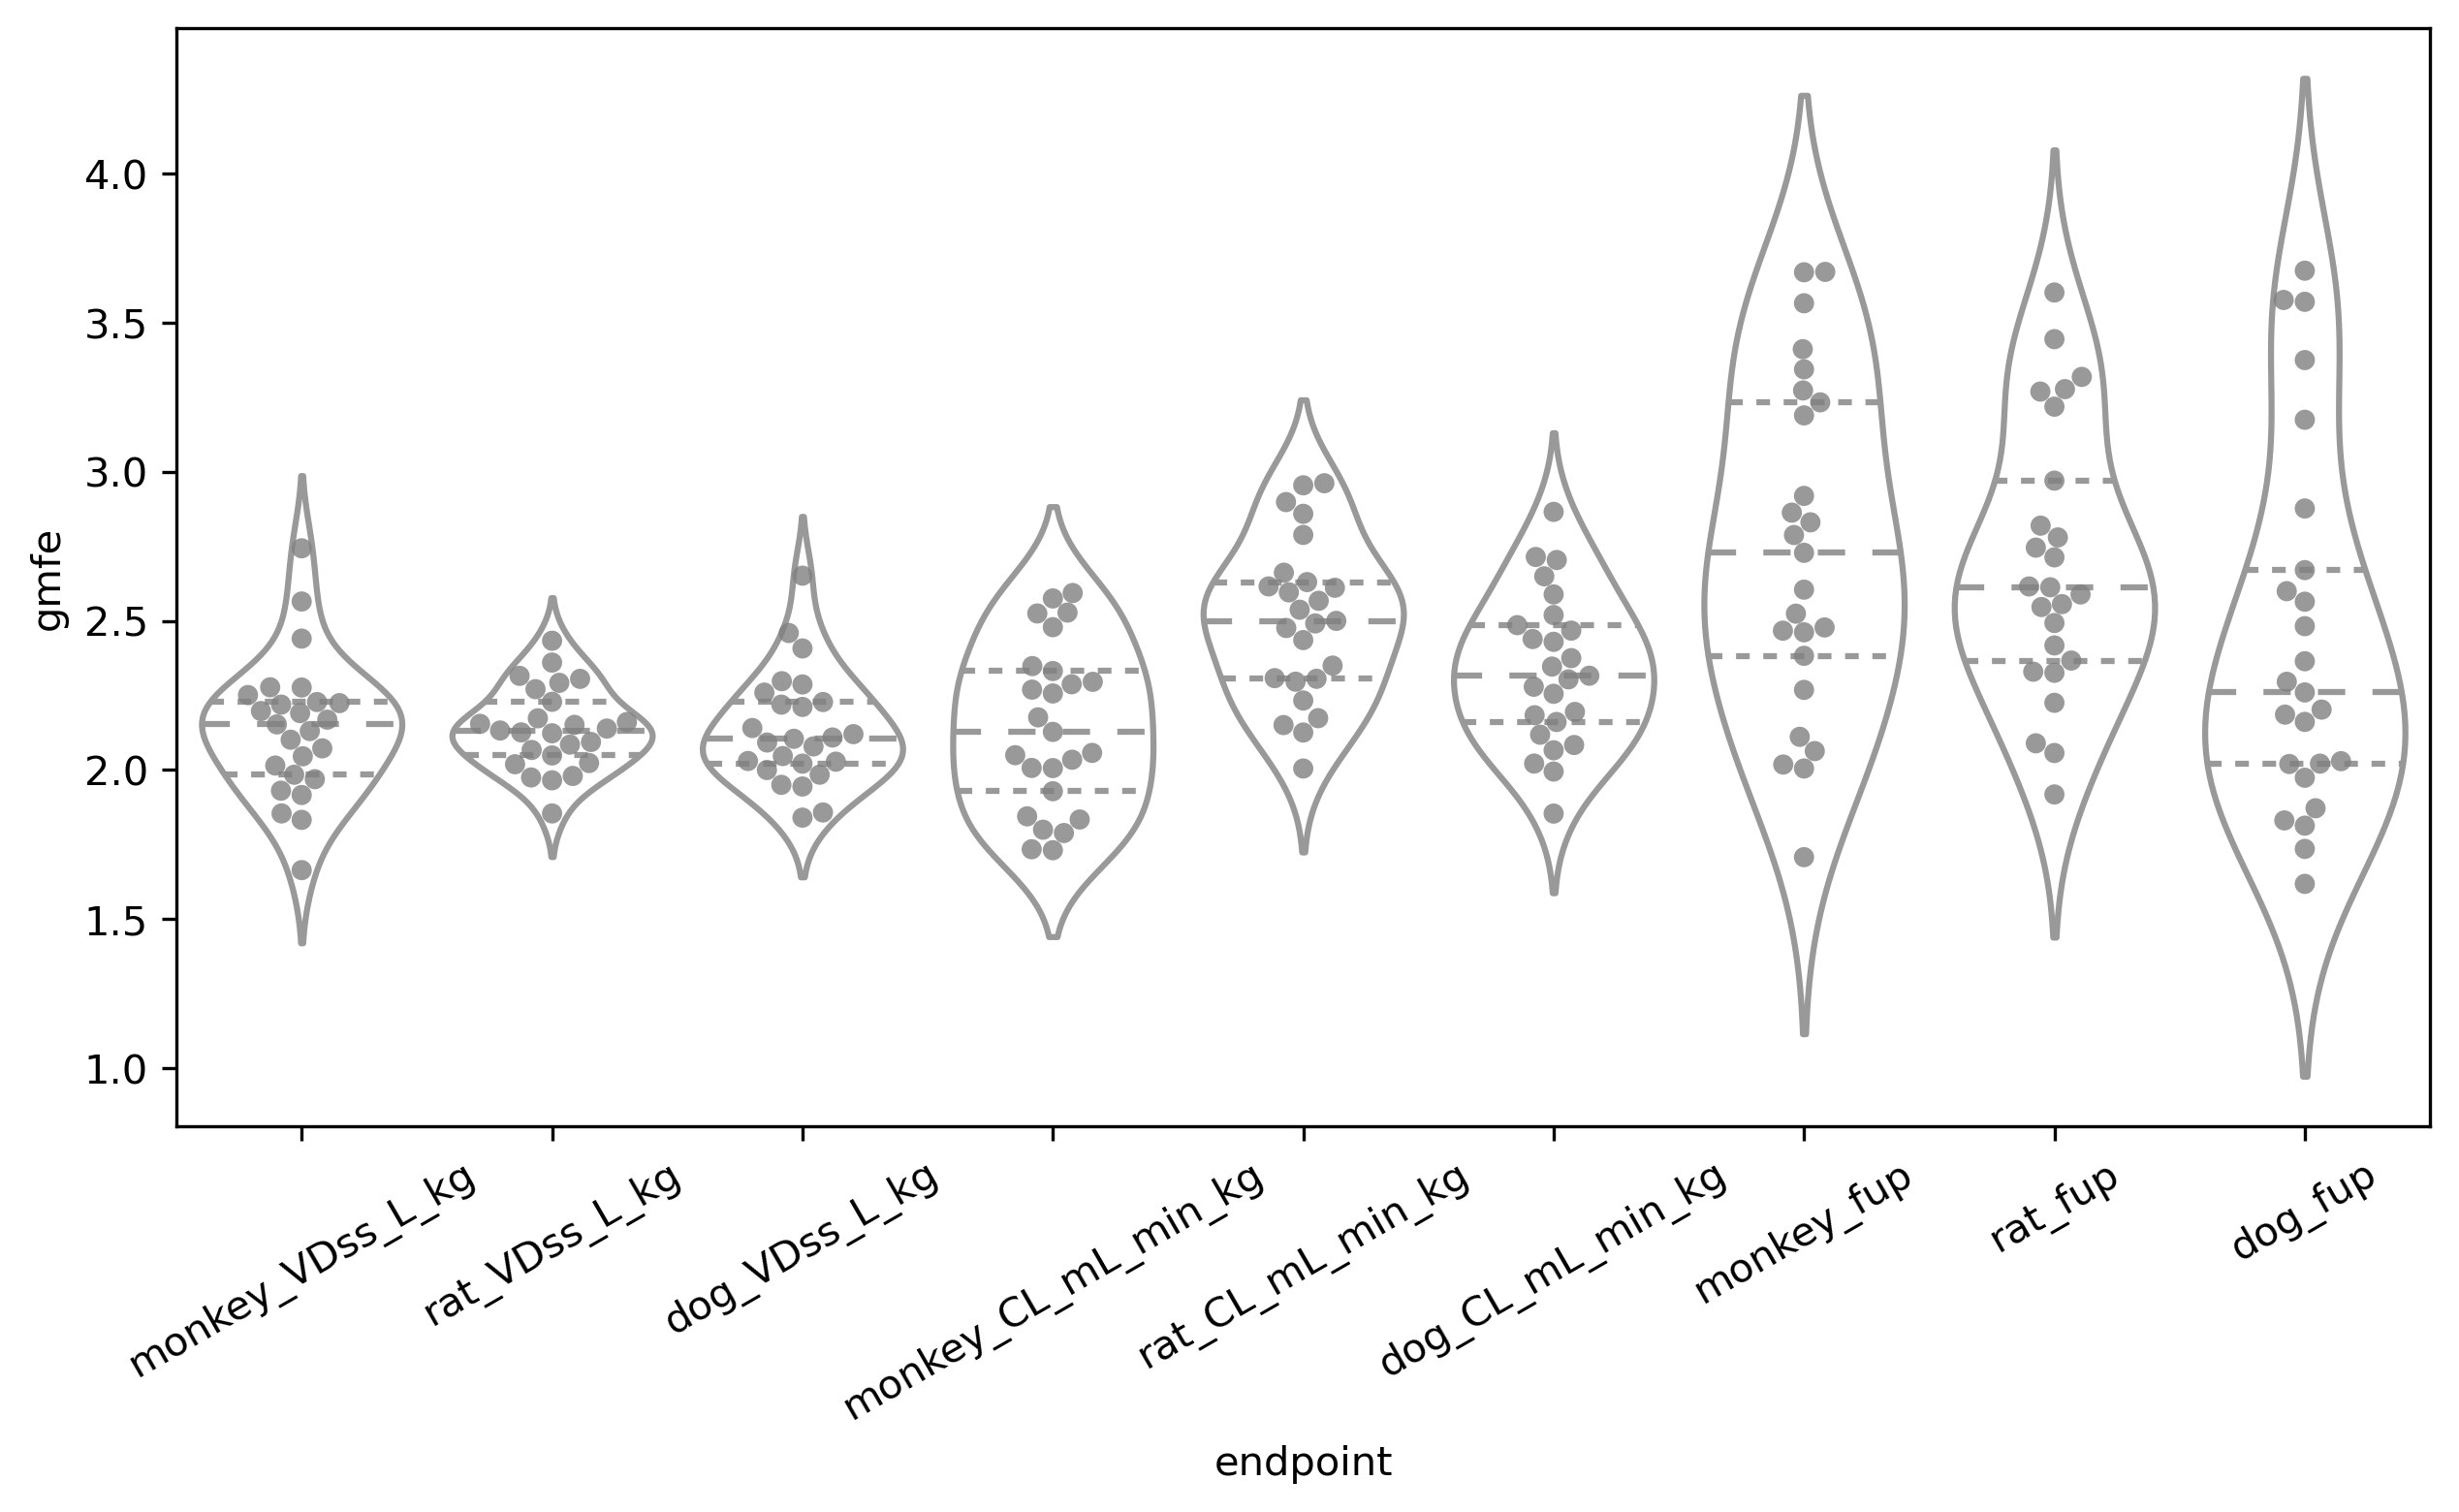

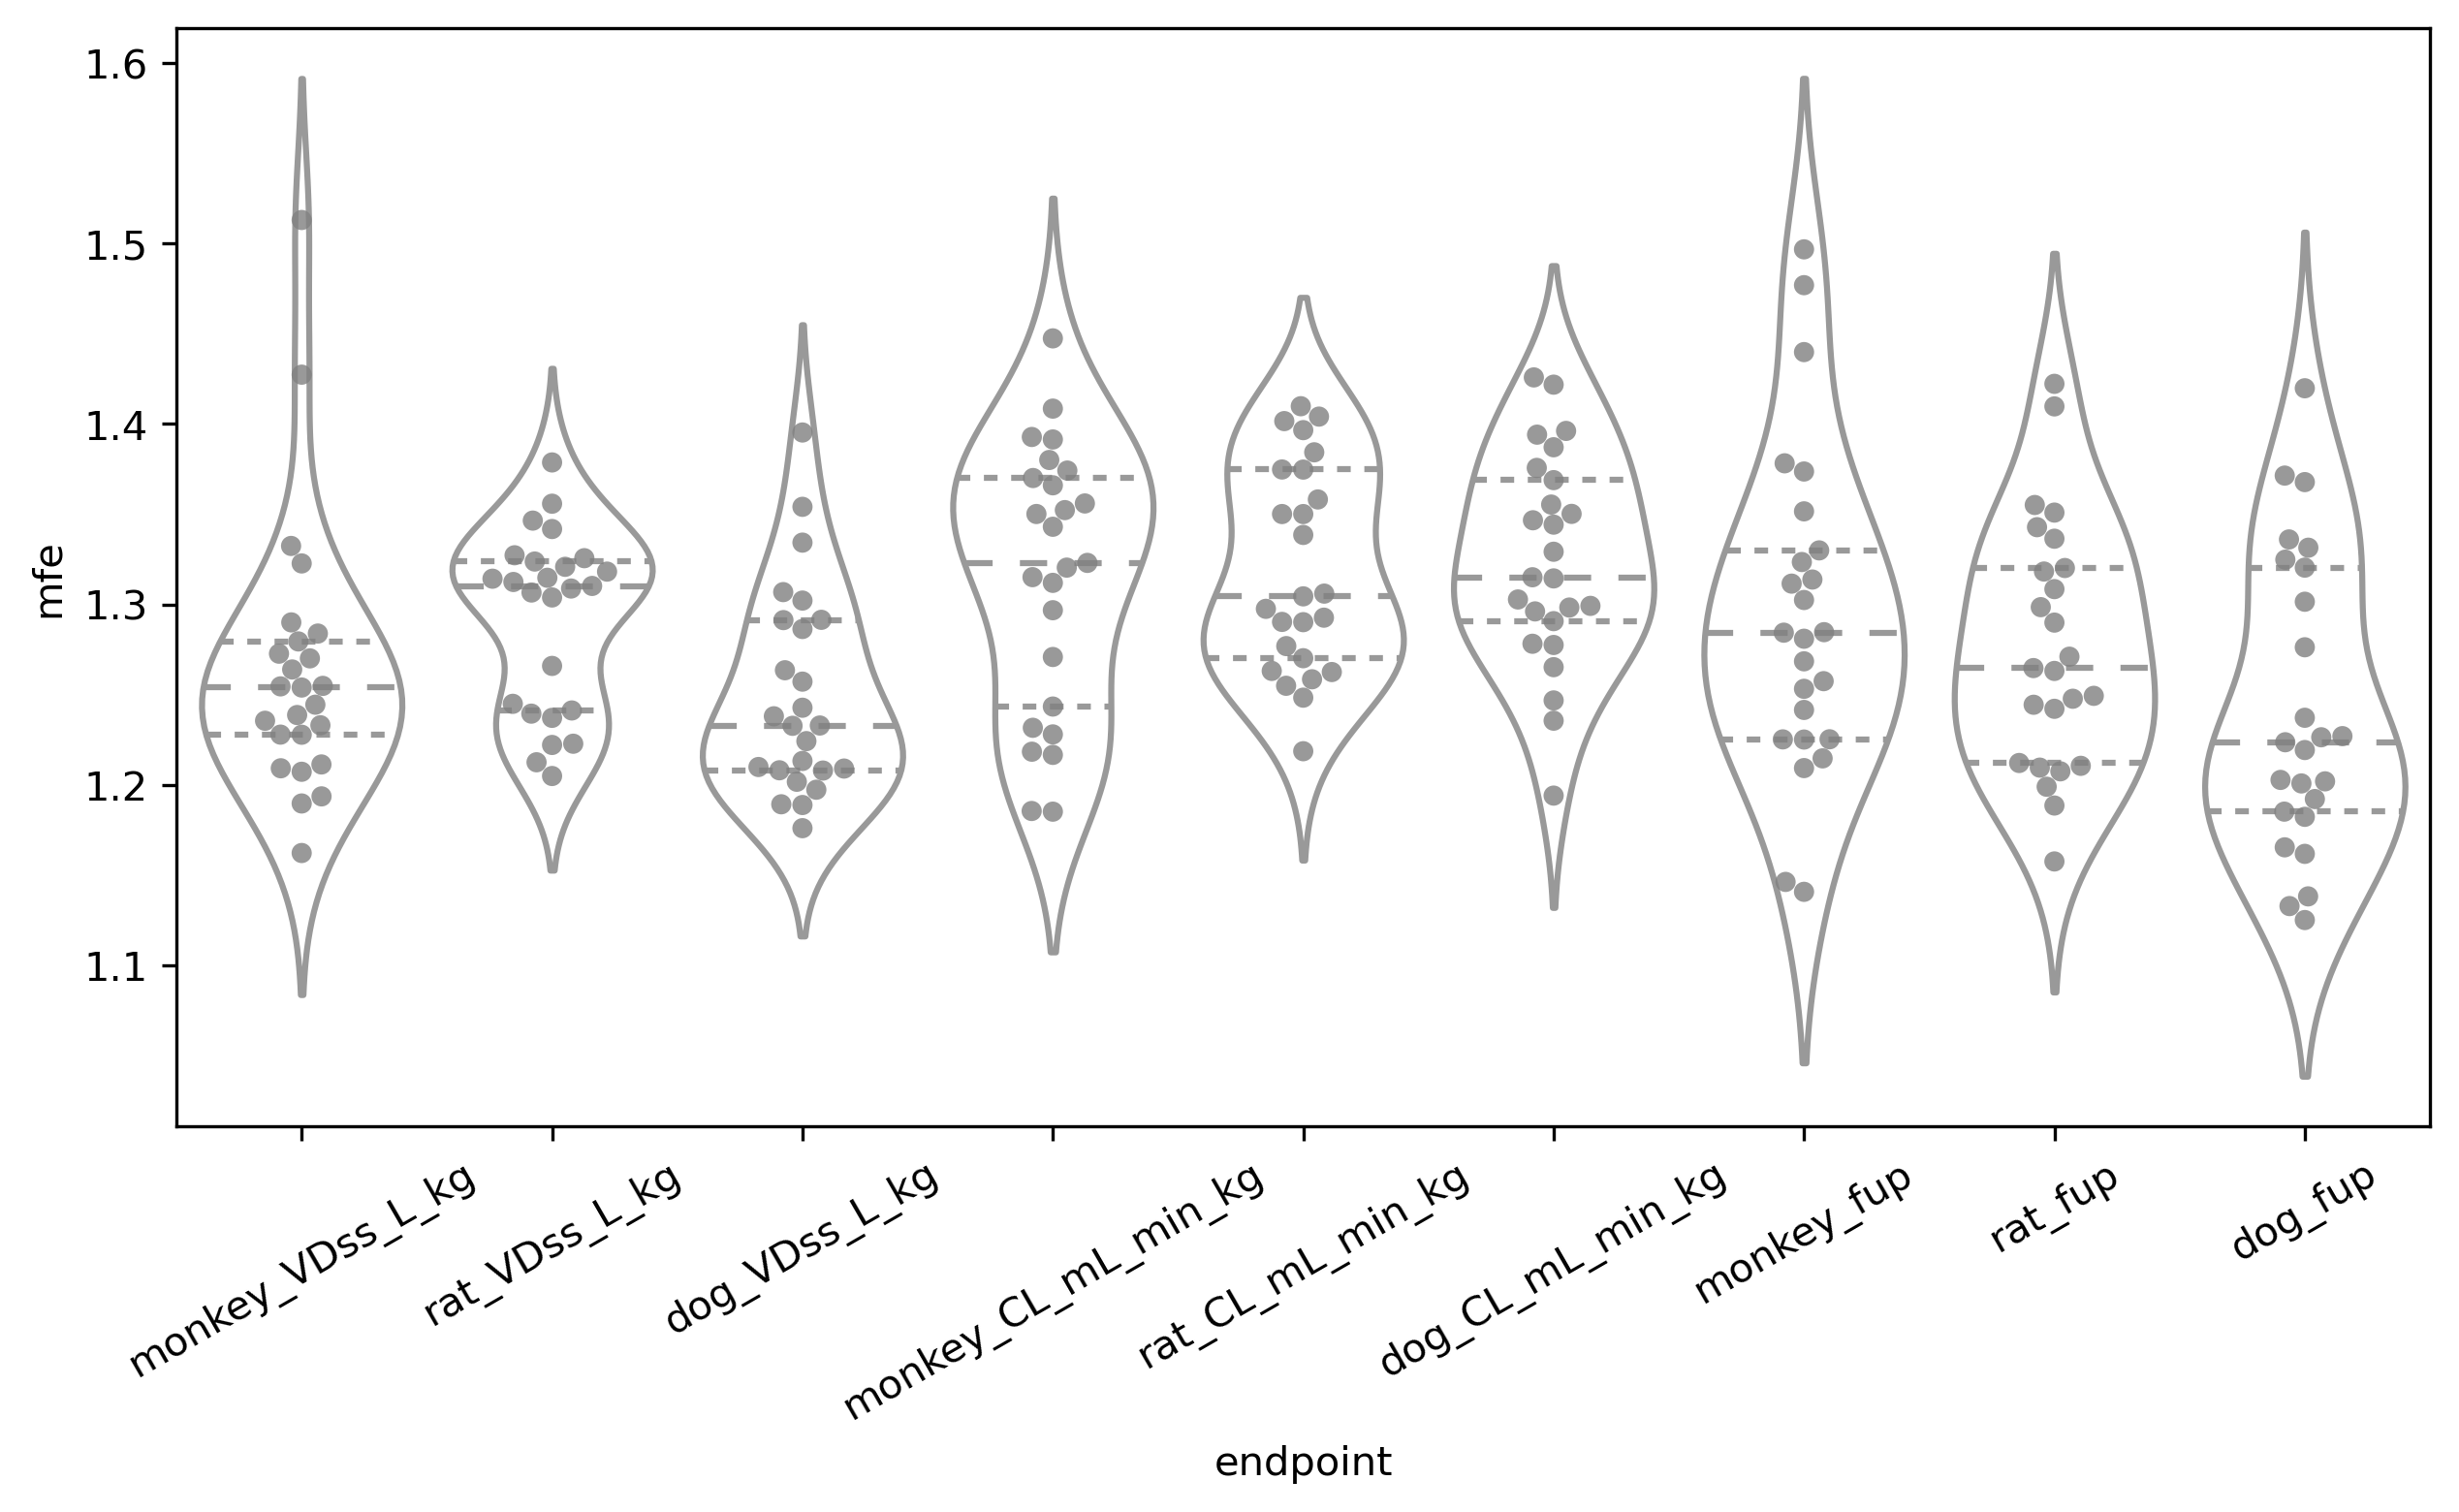

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


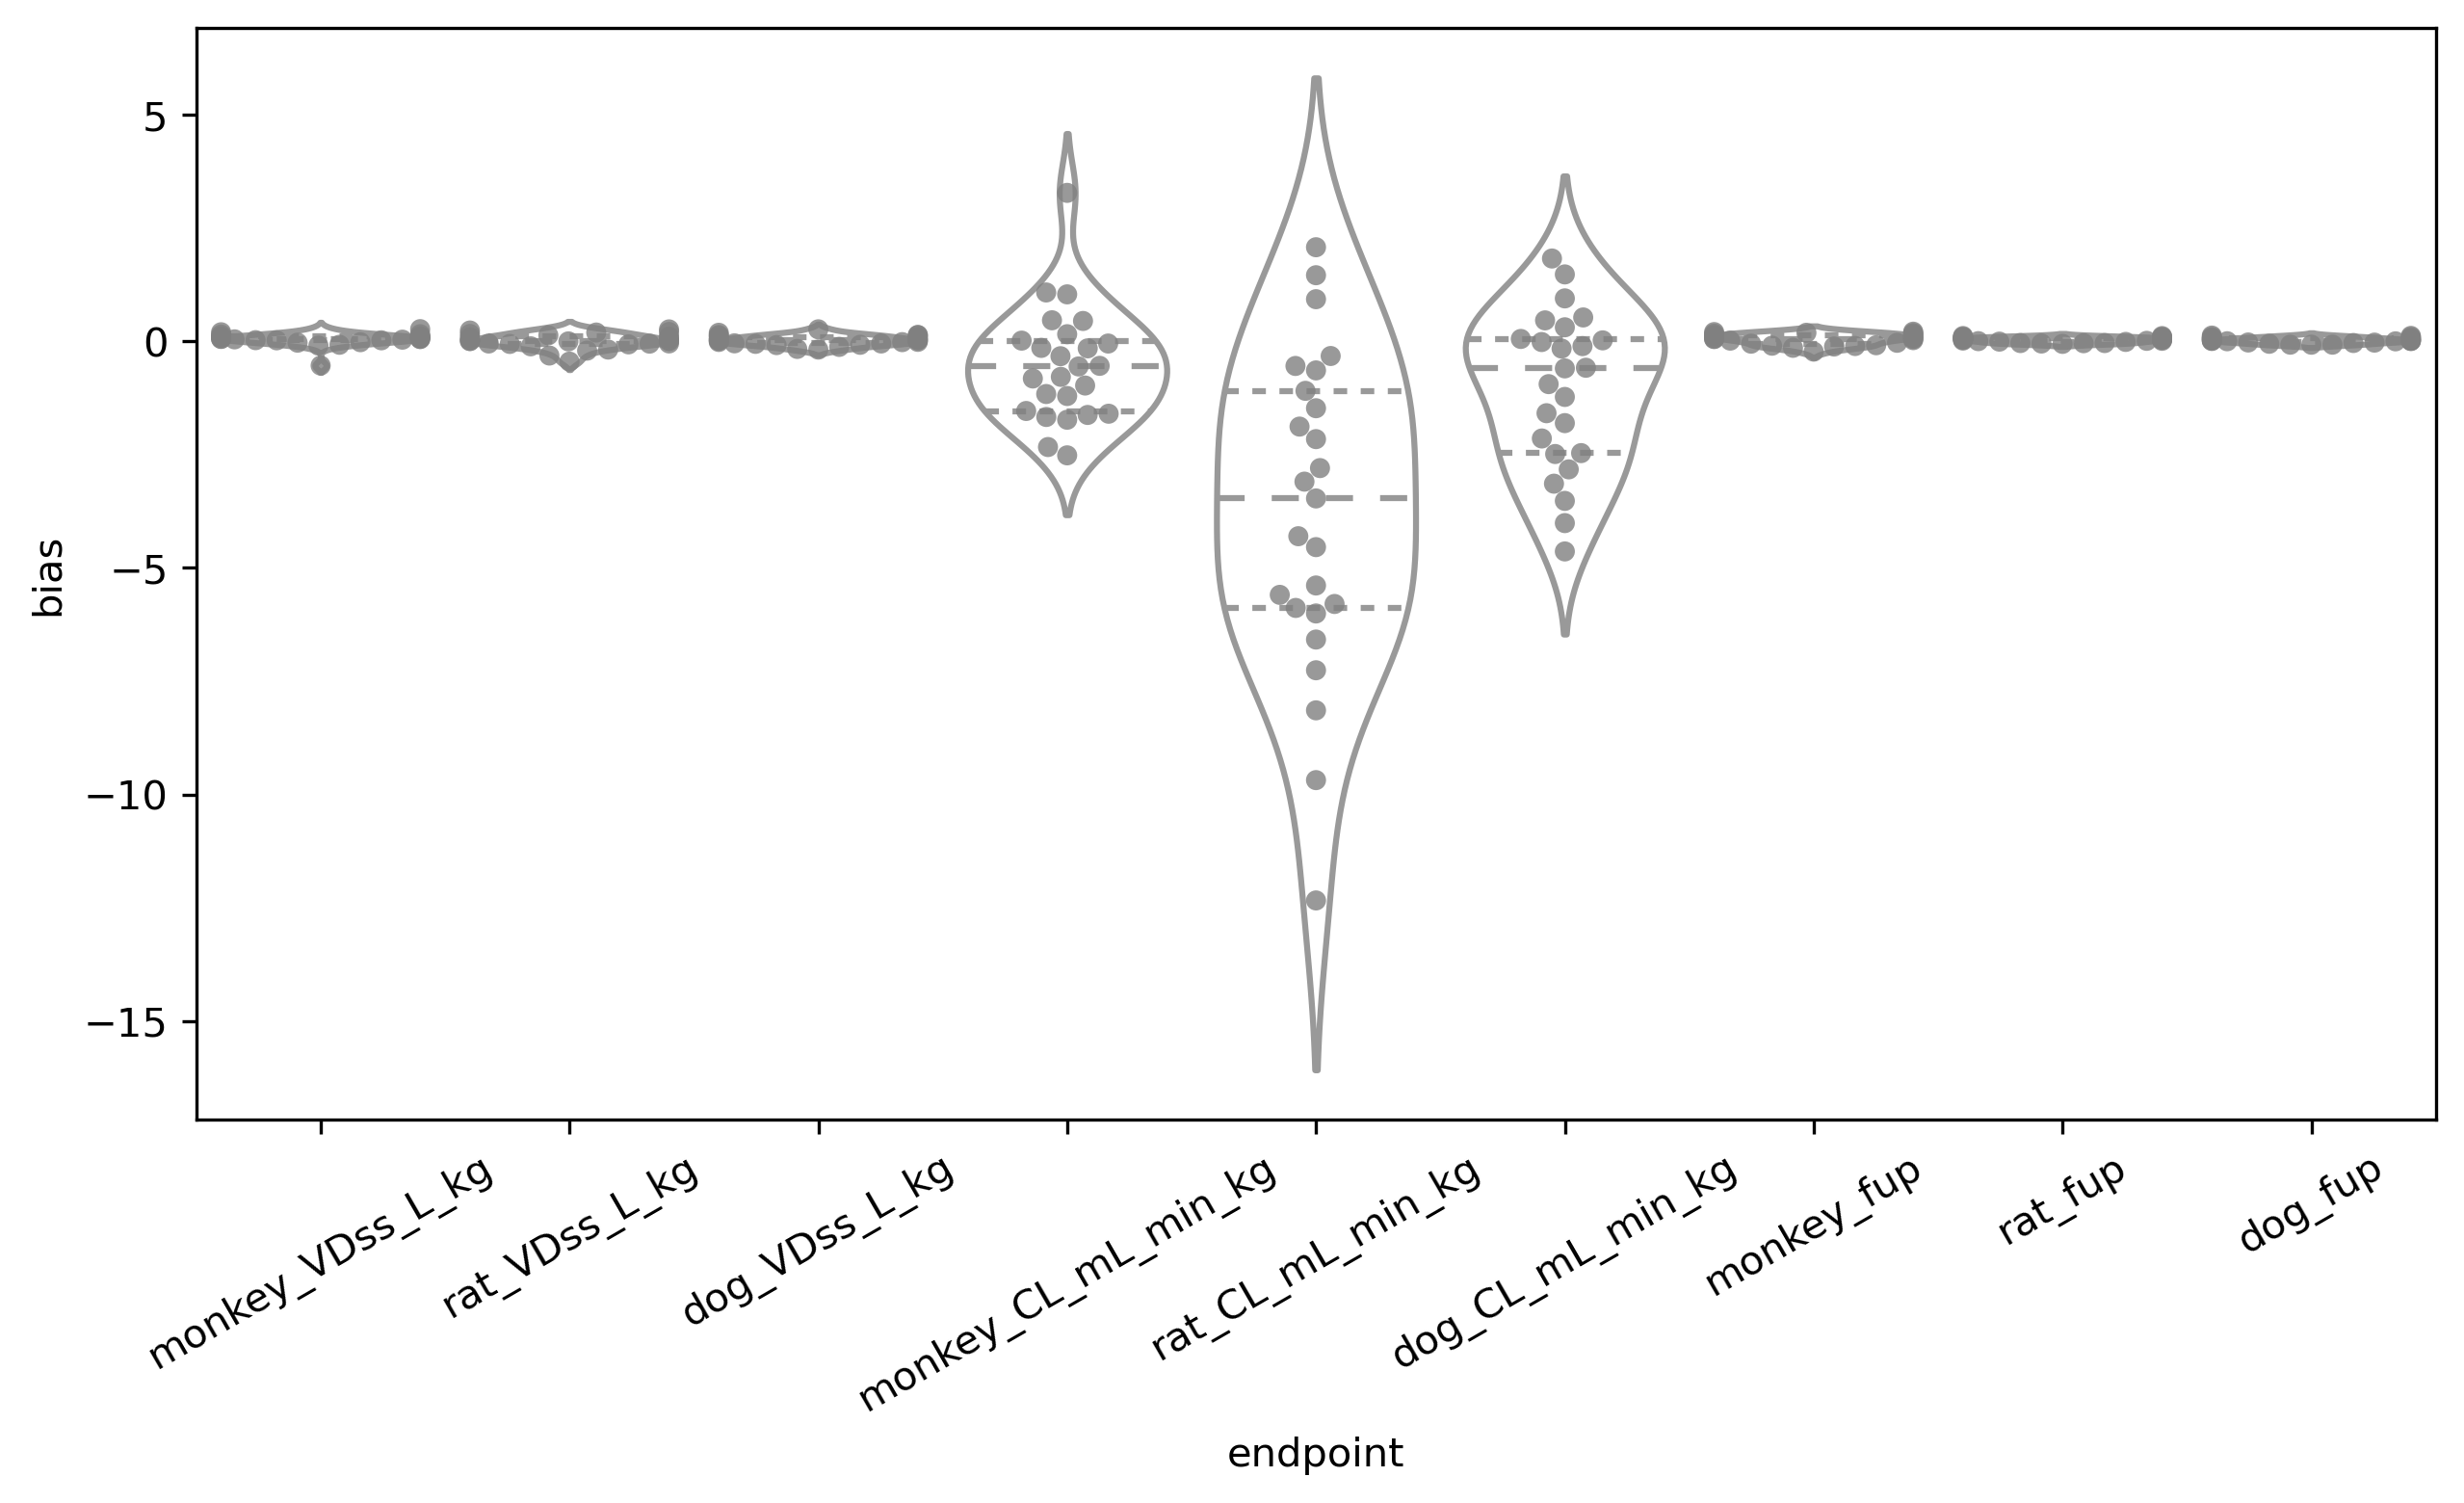

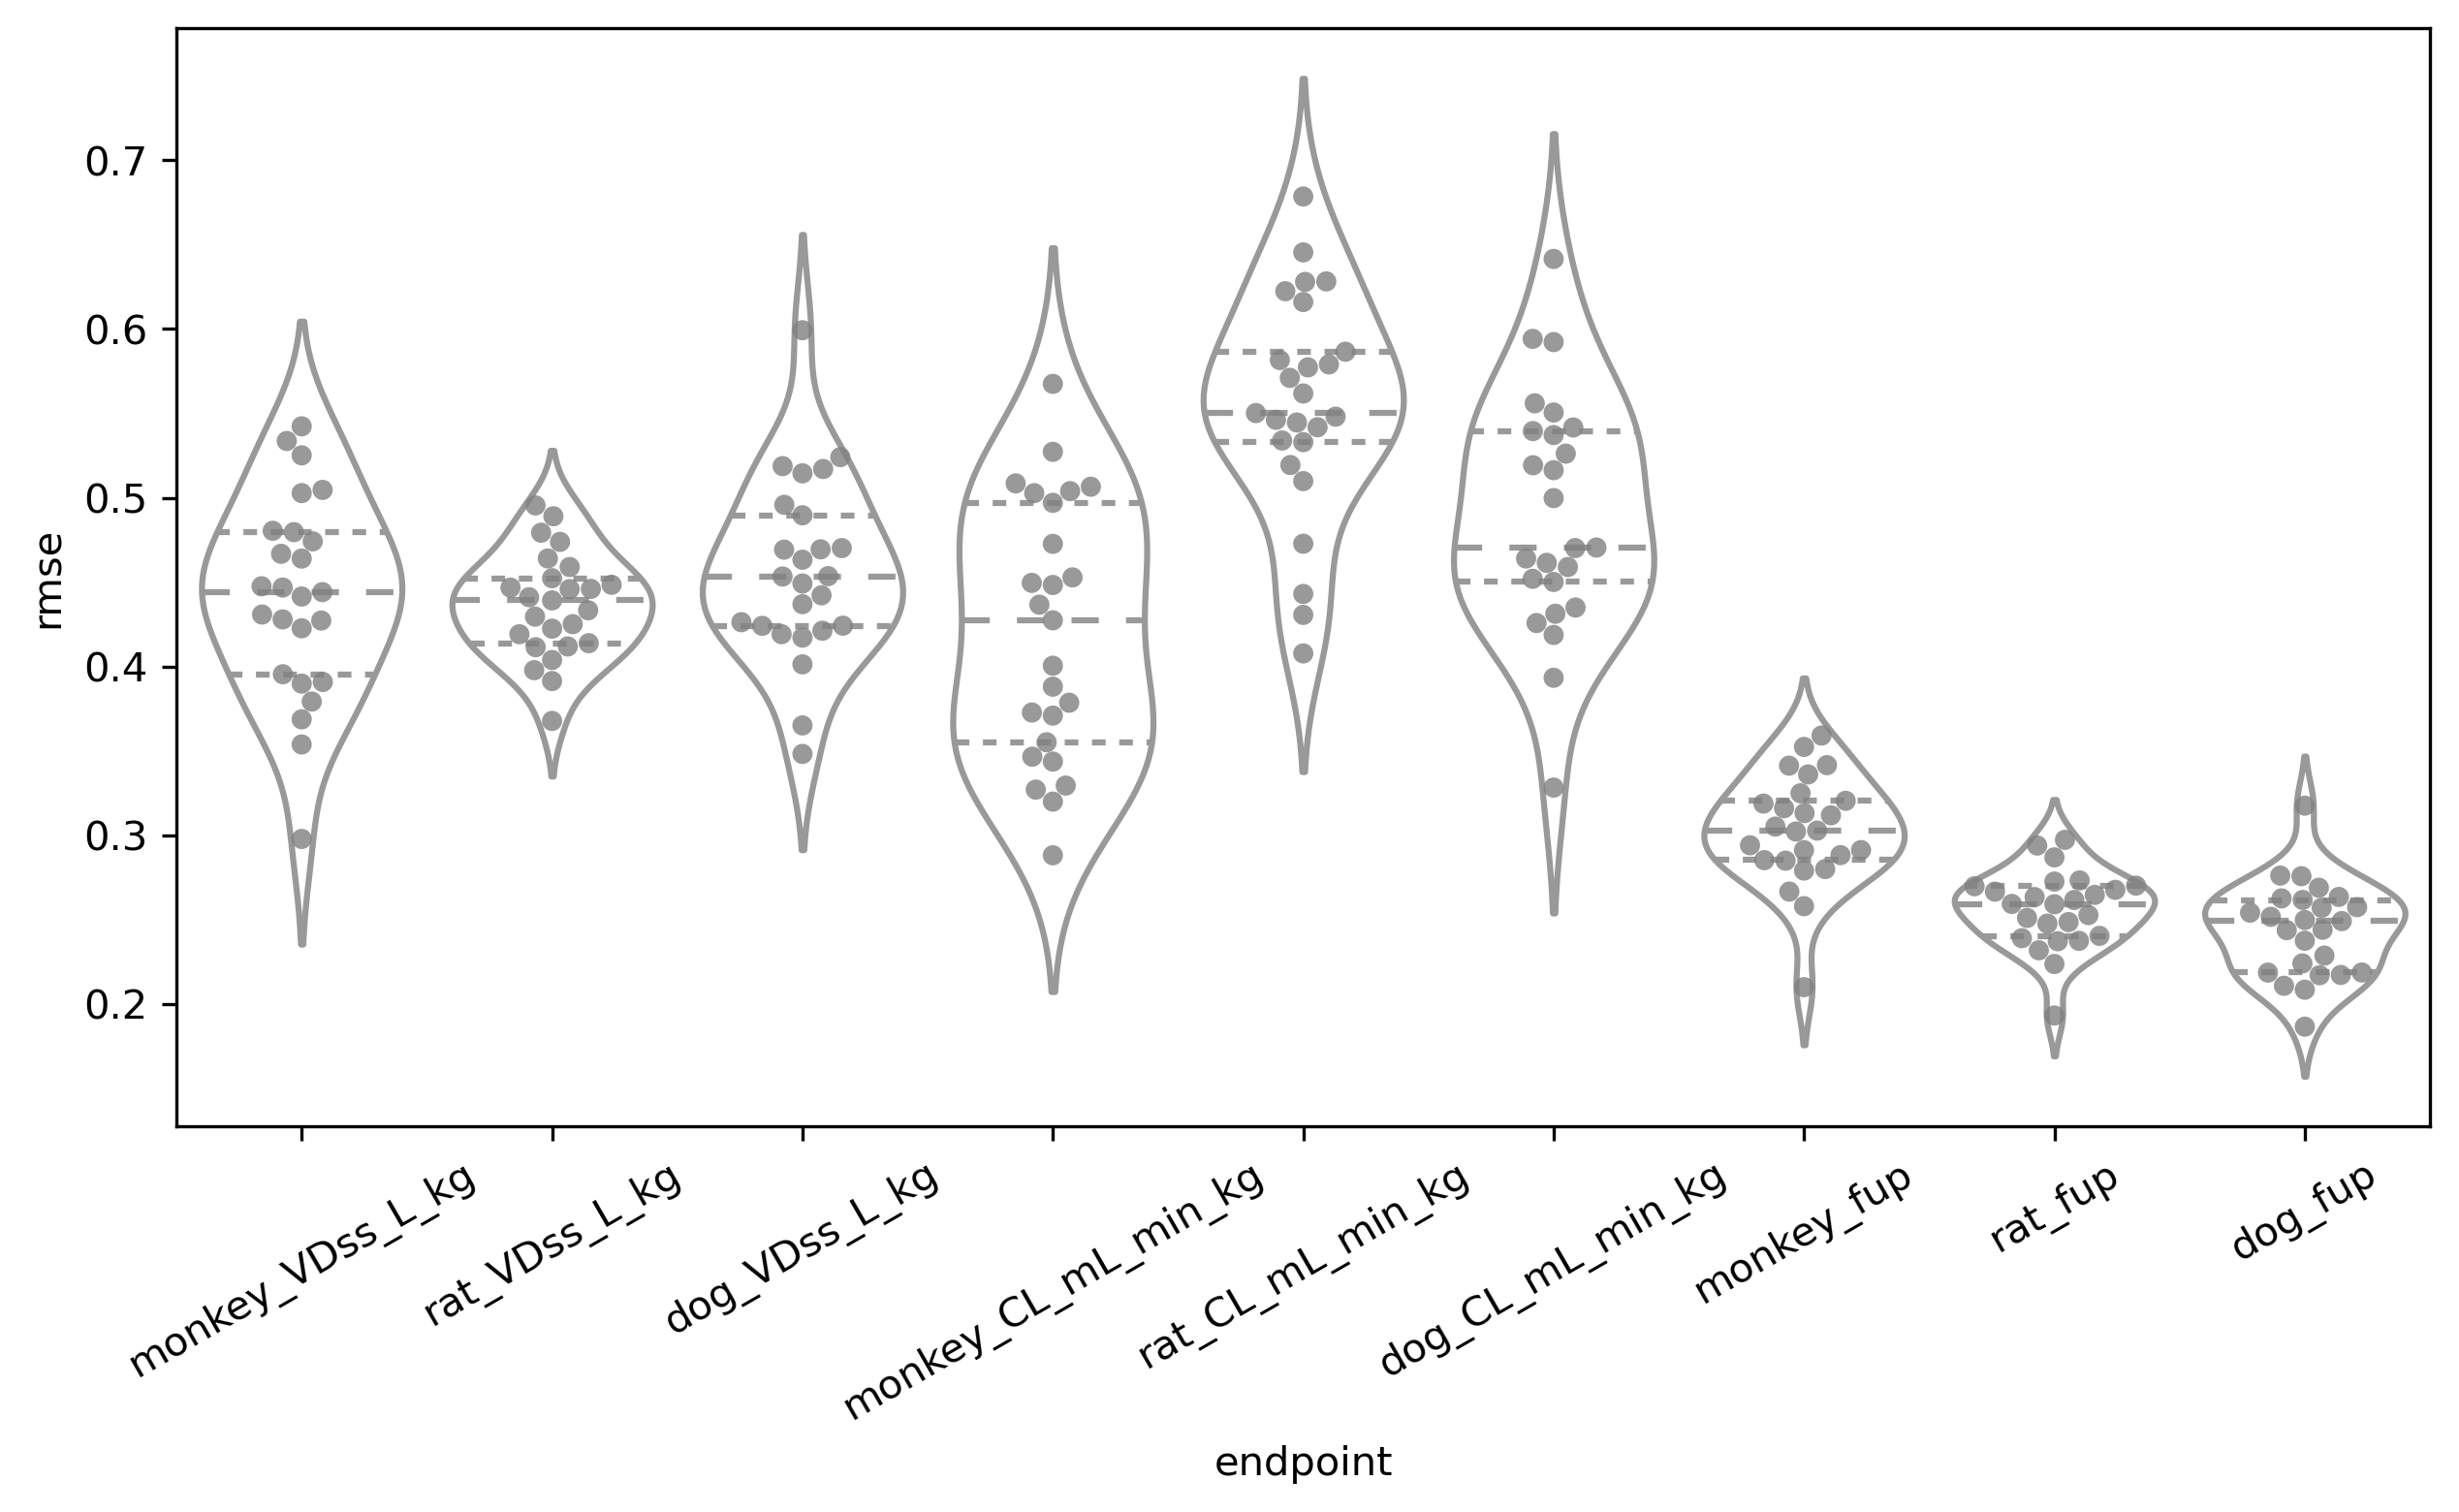

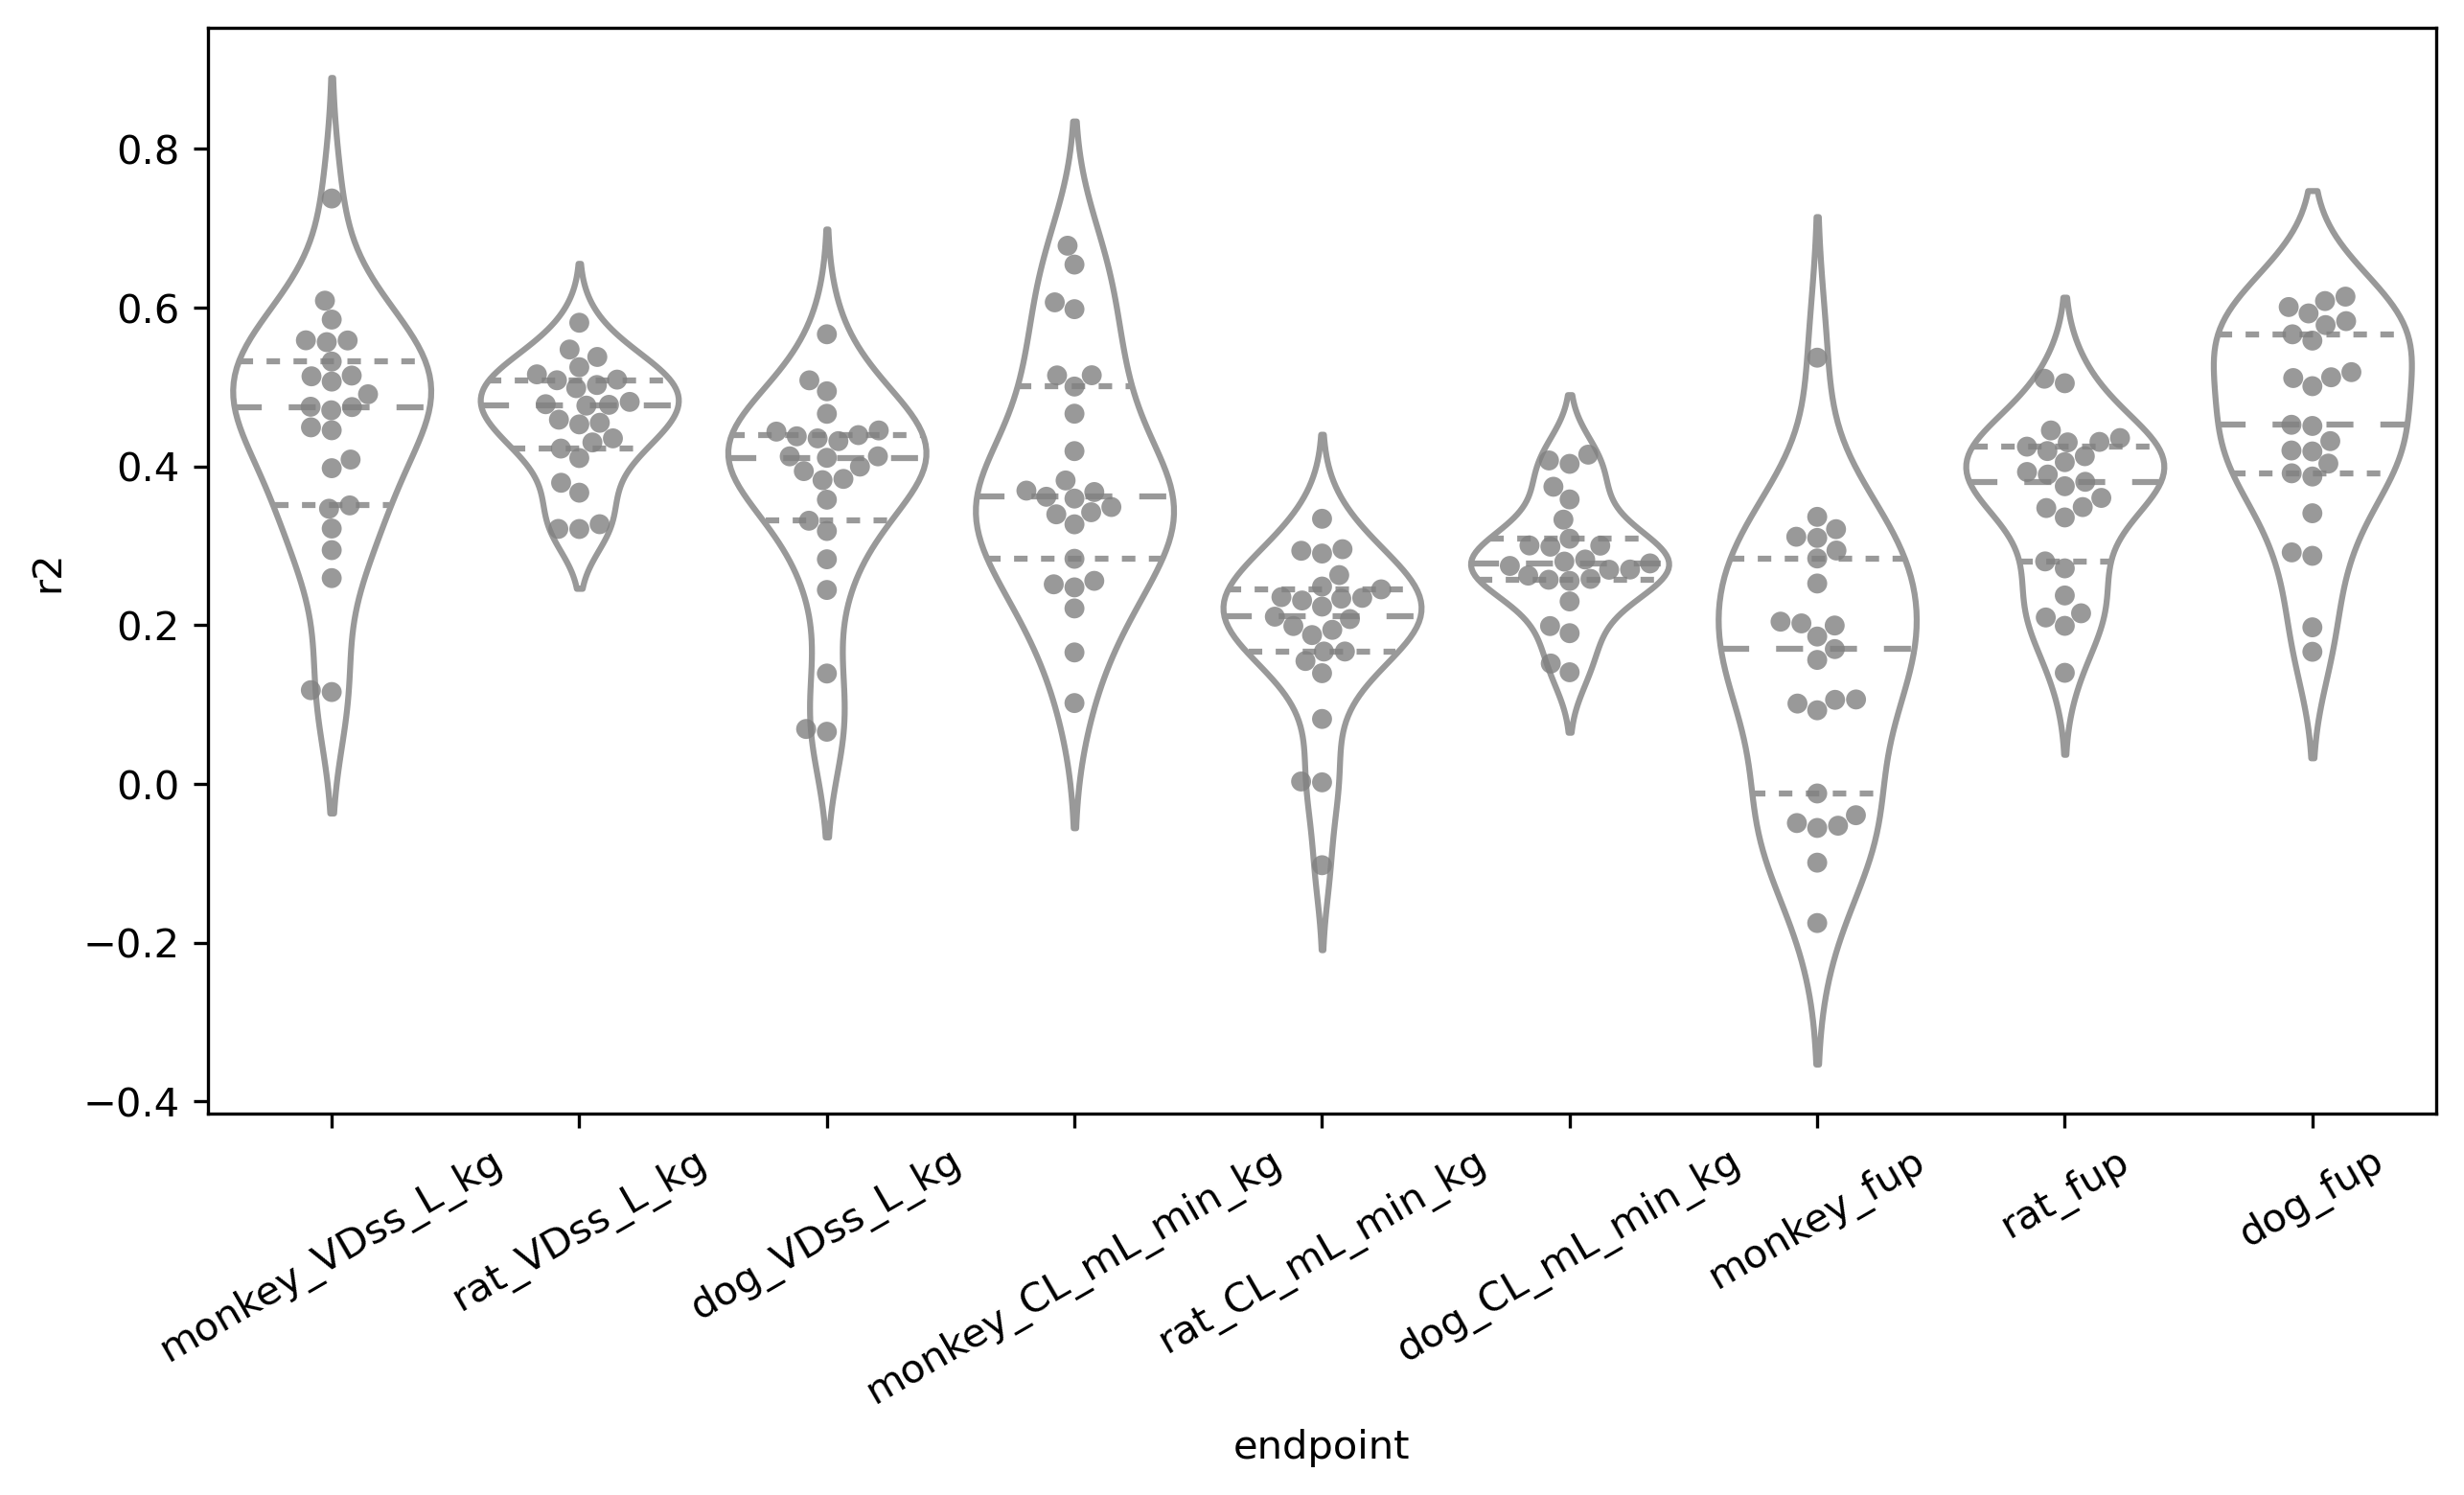

In [9]:
for metric in ["fold_2","fold_3","fold_5","gmfe","mfe","bias","rmse","r2"]:
    
    order= ['monkey_VDss_L_kg', 'rat_VDss_L_kg', 'dog_VDss_L_kg',
            'monkey_CL_mL_min_kg', 'rat_CL_mL_min_kg', 'dog_CL_mL_min_kg',
            'monkey_fup',  'rat_fup', 'dog_fup']
    
    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
        
    #print(endpoint)
            
    data = df#[["monkey_VDss_L_kg","rat_VDss_L_kg", "dog_VDss_L_kg"]]
        
    g = sns.violinplot(ax=ax,order=order, x="endpoint", y=metric, data=data, scale='width', inner='quartile', color="white")
    g = sns.swarmplot(ax=ax, order=order,x="endpoint", y=metric, data=data, color="grey", alpha=0.8)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)        
            
    plt.show()